<a href="https://colab.research.google.com/github/juanpi19/clustered-data-analysis/blob/main/clustered_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm





In [50]:
np.random.seed(42)


school_1 = pd.DataFrame({'school': 'school_1', 'test_grade': np.random.normal(60, 3, 20), 'study_hours': np.random.normal(5, 1.5, 20)})
school_2 = pd.DataFrame({'school': 'school_2', 'test_grade': np.random.normal(64, 3, 20), 'study_hours': np.random.normal(6, 1.5, 20)})
school_3 = pd.DataFrame({'school': 'school_3', 'test_grade': np.random.normal(75, 6, 20), 'study_hours': np.random.normal(7, 1.5, 20)})
school_4 = pd.DataFrame({'school': 'school_4', 'test_grade':np.random.normal(87, 3, 20), 'study_hours': np.random.normal(8, 1.5, 20)})
school_5 = pd.DataFrame({'school': 'school_5', 'test_grade': np.random.normal(90, 3, 20), 'study_hours': np.random.normal(10, 1.5, 20)})

df = pd.concat([school_1, school_2, school_3, school_4, school_5])


In [53]:
df.round(2).head()

,school,test_grade,study_hours
0,school_1,61.49,7.20
1,school_1,59.59,4.66
2,school_1,61.94,5.10
3,school_1,64.57,2.86
4,school_1,59.30,4.18


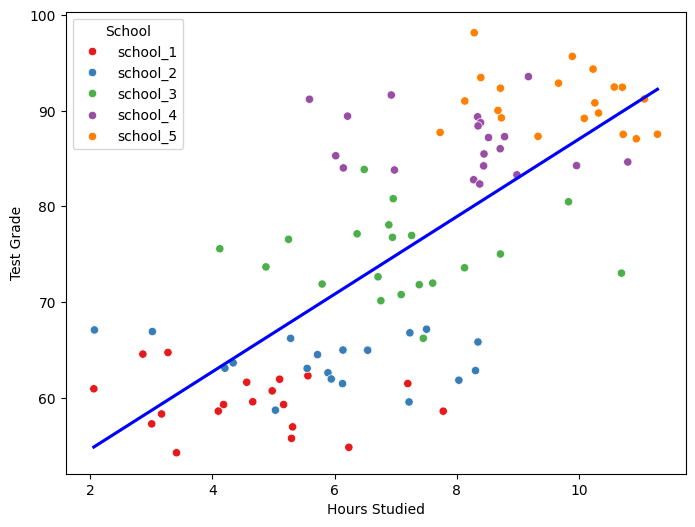

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='study_hours', y='test_grade', hue='school', palette='Set1')
sns.regplot(data=df, x='study_hours', y='test_grade', scatter=False, color='blue', ci=None)  # Adds the trend line

plt.xlabel('Hours Studied')
plt.ylabel('Test Grade')
plt.legend(title='School')
plt.show()

In [56]:
# OLS regression

# variablesfor OLS
X = df[['study_hours']]
y = df['test_grade']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             test_grade   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           7.13e-17
Time:                        22:01:35   Log-Likelihood:                -360.23
No. Observations:                 100   AIC:                             724.5
Df Residuals:                      98   BIC:                             729.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          46.5035      2.977     15.622      

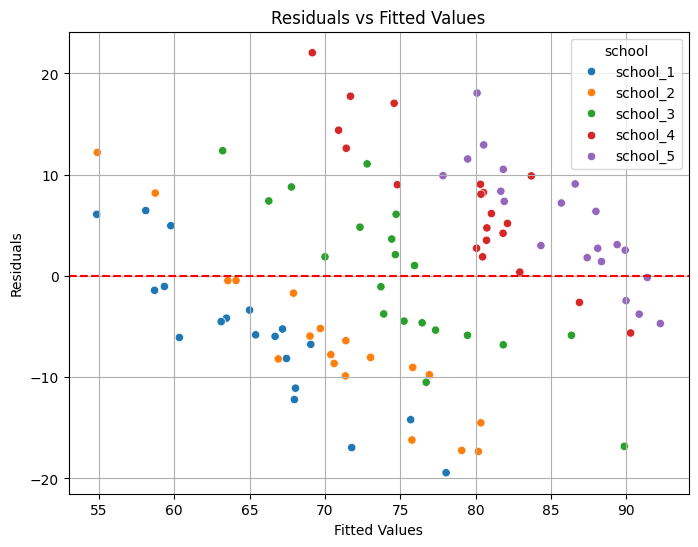

In [66]:
# Model Diagnostics

# Obtain fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

resid_df = pd.DataFrame({'school': df['school'], 'fitted_values': fitted_values, 'residuals': residuals})

# Plot Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=resid_df, x=fitted_values, y=residuals, hue='school')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()